In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset_train = pd.read_csv('NKE_train.csv')
training_set = dataset_train.iloc[:, 1:2].values
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2006,10.85,10.92,10.67,10.74,18468800
1,1/4/2006,10.71,10.80,10.67,10.69,15832000
2,1/5/2006,10.69,10.83,10.69,10.76,9256000
3,1/6/2006,10.79,10.83,10.71,10.72,7573600
4,1/9/2006,10.72,10.98,10.72,10.88,10441600


In [52]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [53]:
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))

In [54]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

regressor = Sequential()

regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

regressor.compile(optimizer='adam',loss='mean_squared_error')

regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
2935/2935 [==============================] - 17s 6ms/step - loss: 0.0153
Epoch 2/100
2935/2935 [==============================] - 13s 4ms/step - loss: 0.0032
Epoch 3/100
2935/2935 [==============================] - 14s 5ms/step - loss: 0.0026
Epoch 4/100
2935/2935 [==============================] - 15s 5ms/step - loss: 0.0025
Epoch 5/100
2935/2935 [==============================] - 13s 5ms/step - loss: 0.0025
Epoch 6/100
2935/2935 [==============================] - 13s 5ms/step - loss: 0.0021
Epoch 7/100
2935/2935 [==============================] - 13s 5ms/step - loss: 0.0018
Epoch 8/100
2935/2935 [==============================] - 13s 5ms/step - loss: 0.0021
Epoch 9/100
2935/2935 [==============================] - 13s 5ms/step - loss: 0.0021
Epoch 10/100
2935/2935 [==============================] - 13s 5ms/step - loss: 0.0019
Epoch 11/100
2935/2935 [==============================] - 13s 5ms/step - loss: 0.0019
Epoch 12/100
2935/2935 [==============================] - 13s 5

2935/2935 [==============================] - 14s 5ms/step - loss: 9.3926e-04
Epoch 95/100
2935/2935 [==============================] - 14s 5ms/step - loss: 9.4922e-04
Epoch 96/100
2935/2935 [==============================] - 15s 5ms/step - loss: 8.6645e-04
Epoch 97/100
2935/2935 [==============================] - 14s 5ms/step - loss: 7.8298e-04
Epoch 98/100
2935/2935 [==============================] - 13s 5ms/step - loss: 7.6778e-04
Epoch 99/100
2935/2935 [==============================] - 14s 5ms/step - loss: 9.0346e-04
Epoch 100/100
2935/2935 [==============================] - 13s 5ms/step - loss: 8.5361e-04


In [55]:
dataset_test = pd.read_csv('NKE_test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [56]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 84):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

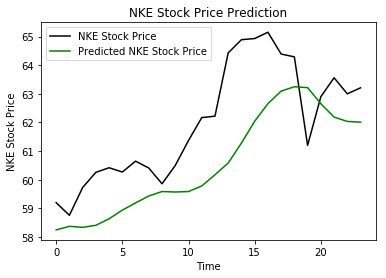

In [59]:
plt.plot(real_stock_price, color='black', label='NKE Stock Price')
plt.plot(predicted_stock_price, color='green', label='Predicted NKE Stock Price')
plt.title('NKE Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('NKE Stock Price')
plt.legend()
plt.show()